# Beta-Binomial mixture

Based on suggestion from Ben's collaborators Kai

In [34]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib inline

In [45]:
def plot_hist(ax, a):
    h, e = np.histogram(a, bins=100, range=(0, upper_bound), density=True)
    ax.hlines(h, e[:-1], e[1:])

Load data

In [74]:
# data_file = '/Users/laserson/tmp/phip_analysis/sjogrens3/counts.tsv'
data_file = '/Users/laserson/tmp/phip_analysis/twin-virscan-larman/counts.tsv'
counts = pd.read_csv(data_file, sep='\t', header=0, index_col=0)

In [33]:
ctrl_cols = [col for col in counts.columns if col.split('.')[2] == 'BEADS_ONLY']
case_cols = [col for col in counts.columns if col.split('.')[2] == 'Sjogrens' and col.split('.')[4] == '20A20G']

In [75]:
trim_percentile = 99.9
upper_bound = sp.stats.scoreatpercentile(counts.values, trim_percentile)
masked_counts = np.ma.masked_greater(counts.values, upper_bound)

Distribution of frequencies

In [108]:
sums = np.ma.sum(masked_counts, axis=1).data
freqs = sums / sums.sum()
(alpha_prior, beta_prior, _, _) = sp.stats.beta.fit(freqs[freqs > 0], floc=0, fscale=1)

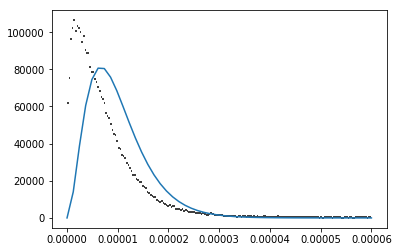

In [119]:
h, e = np.histogram(freqs, bins='auto', range=(0, 6e-5), density=True)
(fig, ax) = plt.subplots()
ax.hlines(h, e[:-1], e[1:])
x = np.linspace(0, 6e-5)
y = sp.stats.beta.pdf(x, 3, 300000)
ax.plot(x, y)

In [110]:
sp.stats.beta?

In [115]:
alpha_prior

0.81813443100389305

In [117]:
beta_prior

78466.878584780323

In [44]:
18345 / 259345

0.07073589234417475

In [78]:
counts.columns

Index(['Twins1.serum.Twins.91302.20A20G.1',
       'Twins4.serum.Twins.23992.20A20G.1', 'Twins3.serum.Twins.202.20A20G.1',
       'Twins3.serum.Twins.51402.20A20G.1',
       'Twins6.serum.Twins.32592.20A20G.1',
       'Twins1.serum.Twins.94452.20A20G.1', 'Twins6.serum.Twins.7252.20A20G.1',
       'Twins5.serum.Control.ControlX.20A20G.1',
       'Twins4.serum.Twins.20082.20A20G.1',
       'Twins5.serum.Twins.53871.20A20G.1',
       ...
       'Twins5.serum.Twins.4172.20A20G.1', 'Twins6.serum.Twins.50972.20A20G.1',
       'Twins2.serum.Twins.51272.20A20G.1',
       'Twins2.serum.Twins.99201.20A20G.1', 'Twins4.serum.Twins.1381.20A20G.1',
       'Twins6.serum.Twins.2632.20A20G.1', 'Twins1.serum.Twins.21192.20A20G.1',
       'Twins4.serum.Twins.30791.20A20G.1',
       'Twins6.serum.Twins.20552.20A20G.1',
       'Twins3.serum.Twins.59451.20A20G.1'],
      dtype='object', length=576)

In [159]:
from scipy.special import betaln

def fit_betabinom(counts):
    M = len(counts)
    N = counts.sum()

    def nll(x):
        alpha = x[0]
        beta = x[1]
        return -1 * (betaln(counts + alpha, N - counts + beta).sum() - M * betaln(alpha, beta))

    return sp.optimize.minimize(nll,
                                 np.asarray([.1, 100000]),
                                 bounds=[(np.nextafter(0, 1), None),
                                         (np.nextafter(0, 1), None)])
    (alpha, beta) = param.x
    return (alpha, beta)


In [160]:
fit_betabinom(counts.sum(axis=1).values)

      fun: 2903962146.4727883
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.22135067e+07,   2.24113464e+03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 57
      nit: 2
   status: 0
  success: True
        x: array([  1.10000011e+00,   1.00000000e+05])

In [149]:
sp.optimize.minimize(nll_betabinom(counts.sum(axis=1).values), np.asarray([0.5, 10]), bounds=[(np.nextafter(0, 1), None),
                                         (np.nextafter(0, 1), None)], method='CG')

/Users/laserson/miniconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:518: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)


     fun: 1207163.7052453682
     jac: array([-1068503.5,    -4925. ])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 268
     nit: 0
    njev: 64
  status: 2
 success: False
       x: array([  0.5,  10. ])

In [134]:
f = nll_betabinom(counts.sum(axis=1).values)

In [145]:
f([.1, 100000])

980649.8762512207

In [162]:
sp.special.beta(np.asarray([1, .1]), np.asarray([1, 10]))

array([ 1.     ,  7.59138])

In [164]:
sp.special.beta(.1, 10)

7.5913800009109984